In [1]:
from snAPI.Main import *
import matplotlib.pyplot as plt
import os
import pandas as pd

In [4]:
class HH_T3:
    def __init__(self,sn,filename):
        sn.getDevice()
        sn.getFileDevice(filename)
        sn.initDevice(MeasMode.T3)
        self.t_resol=sn.deviceConfig['Resolution']/1000
        sn.raw.measure()
        self.data = sn.raw.getData()
        self.channels=sn.raw.channel(self.data)
        self.dTimes=sn.raw.dTime_T3(self.data)[np.where(self.channels!=64)]*self.t_resol
        self.dataChannels=self.channels[np.where(self.channels!=64)]
        sn.unfold.measure(120)
        self.absTimes=sn.unfold.getData()[0]*self.t_resol
        self.df=pd.DataFrame(np.array([self.dTimes,self.absTimes,self.dataChannels]).T,columns=['dTimes','absTimes','Channels'])
        sn.closeDevice()
    def Gate(self,T,ch):
        return self.df[(self.df['dTimes']>T)&(self.df['Channels']==ch)]
    def Counts(self,ch):
        return np.size(self.df['dTimes'][self.df['Channels']==ch])
    

In [5]:
sn=snAPI()

In [6]:
dataf1='C:/Users/Mikel/Documents/Data analysis/Narrow field/Data/APD/Quartz_not_heated_A/Filter0/default.ptu'
dataf2='C:/Users/Mikel/Documents/Data analysis/Narrow field/Data/APD/Quartz_heated_1000_overnight_A/Filter0/default.ptu'
dataf3='C:/Users/Mikel/Documents/Data analysis/Narrow field/Data/APD/Quartz_Docter_ARF_heated/Filter0/default.ptu'

In [7]:
m1=HH_T3(sn,filename=dataf1)
m2=HH_T3(sn,filename=dataf2)
m3=HH_T3(sn,filename=dataf3)

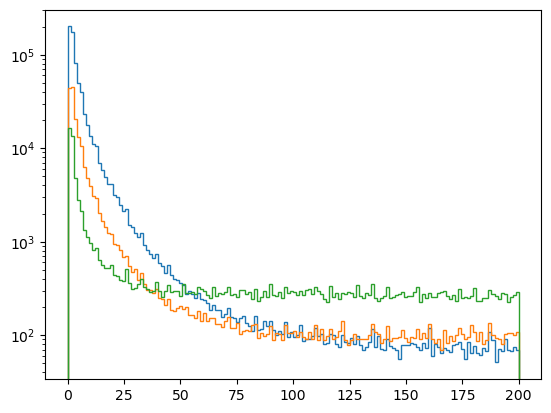

In [18]:
plt.hist(m1.dTimes,bins=150,log=True,histtype='step');
plt.hist(m2.dTimes,bins=150,log=True,histtype='step');
plt.hist(m3.dTimes,bins=150,log=True,histtype='step');

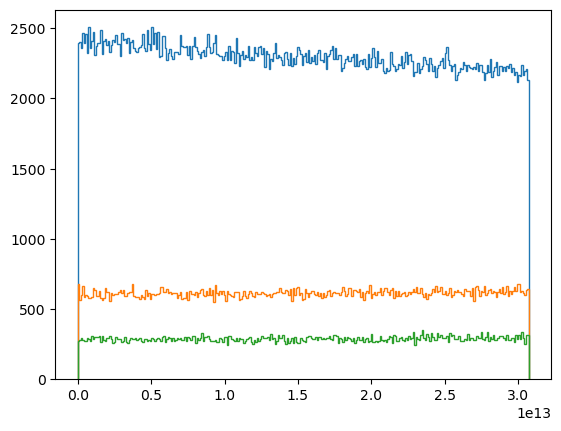

In [19]:
plt.hist(m1.absTimes,bins=300,log=False,histtype='step');
plt.hist(m2.absTimes,bins=300,log=False,histtype='step');
plt.hist(m3.absTimes,bins=300,log=False,histtype='step');

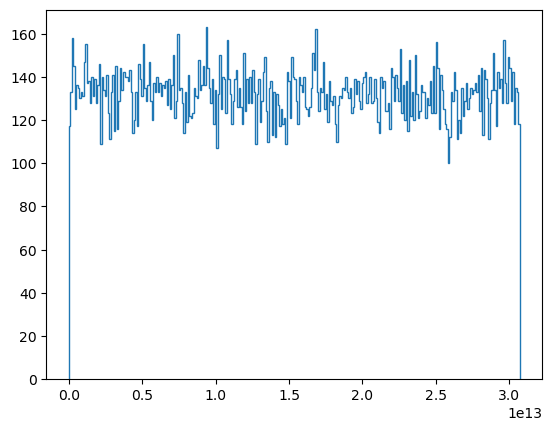

In [14]:
plt.hist(m1.Gate(20,ch=3)['absTimes'],bins=300,histtype='step');